In [1]:
# Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [2]:
# importing the dataset

data = pd.read_csv("D:\Intellipaat\Assignments\Capstone Project\Capstone-Dataset\Walmart (1).csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
# converting the data to datetime object type

data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [6]:
# Changing the column to index

data.index = data['Date']
del data['Date']

In [7]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

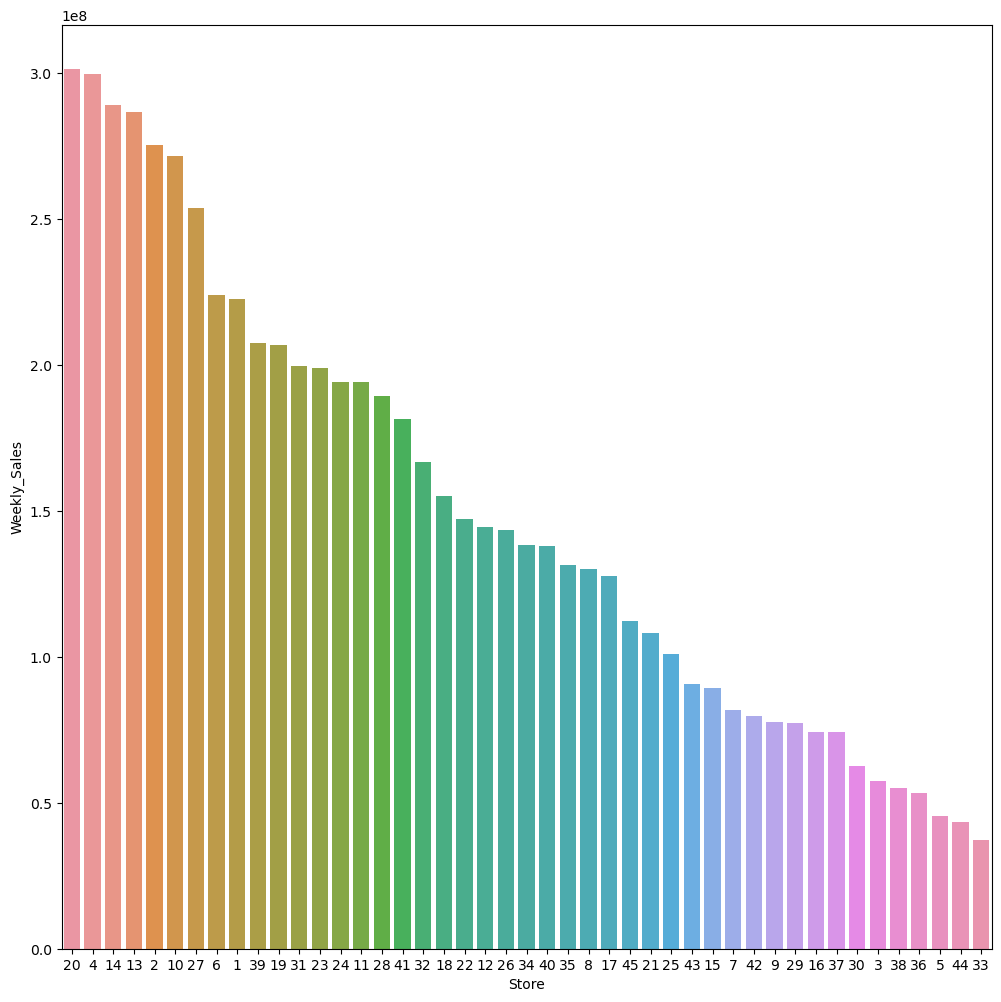

In [8]:
# Store Analysis : Store performance based on Total Sales

store_total_sales = data.groupby('Store')['Weekly_Sales'].sum().reset_index()
sorted_store_total_sales = store_total_sales.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize = (12,12))
sns.barplot(data=sorted_store_total_sales, x='Store', y='Weekly_Sales',
            order=store_total_sales.sort_values('Weekly_Sales', ascending=False).Store)

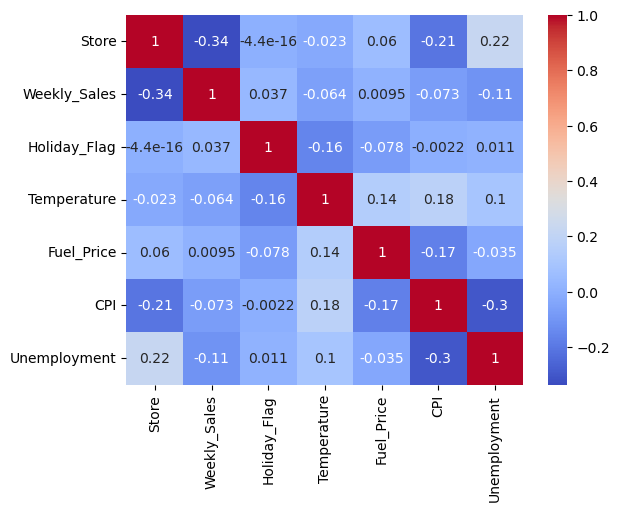

In [9]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [10]:
# Inference from the above correlation graph

    # Unemployment data has a negative correlation with Weekly sales, which shows the when there is low unemployment 
    # the weekly sales.
    
    # CPI (Consumer Price Index) data also has negative effect with Weekly Sales, indicating that as CPI data increases,
    # weekly sales tend to decrease 
    
    # Holiday_Flag data has a (+) positive effect in Weekly Sales
    
    # Temperature data has a (-) negative effect in Weekly Sales, people tend to shop during colder climates
    # The sales peaks during the Winter season (December) as it is a month of celebration
    

In [11]:
a= int(input("Enter the store id:"))
store = data[data.Store == a]

Enter the store id:7


In [12]:
# Time Series Vizualization
store

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,7,496725.44,0,10.53,2.580,189.381697,9.014
2010-02-12,7,524104.92,1,25.90,2.572,189.464272,9.014
2010-02-19,7,506760.54,0,27.28,2.550,189.534100,9.014
2010-02-26,7,496083.24,0,24.91,2.586,189.601802,9.014
2010-03-05,7,491419.55,0,35.86,2.620,189.669505,9.014
...,...,...,...,...,...,...,...
2012-09-28,7,525545.76,0,50.64,3.789,198.590328,7.872
2012-10-05,7,505830.56,0,48.43,3.779,198.822132,7.557
2012-10-12,7,503463.93,0,41.43,3.760,199.053937,7.557


<AxesSubplot:xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

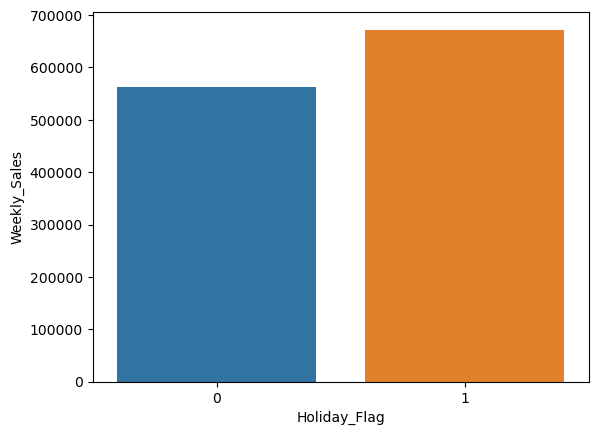

In [13]:
# Holiday Analysis: To identify any increase or decrease in sales during holiday periods

holiday_total_sales = store.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()
sns.barplot(data=holiday_total_sales, x='Holiday_Flag', y='Weekly_Sales')

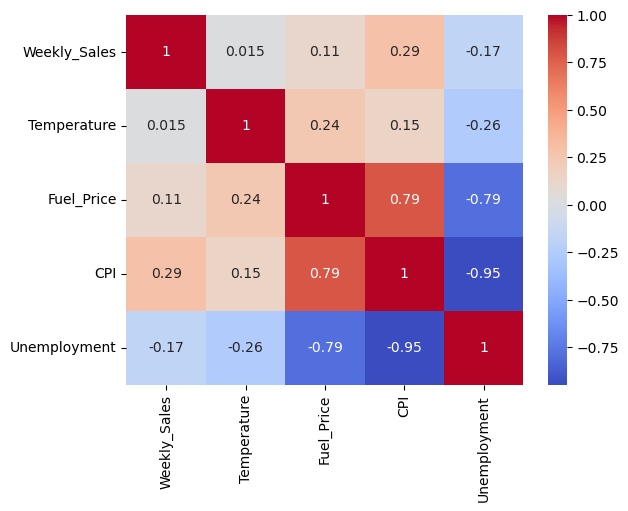

In [14]:
store_correlation = store[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']]
sns.heatmap(store_correlation.corr(), annot=True, cmap='coolwarm')
plt.show()

<AxesSubplot:xlabel='Date'>

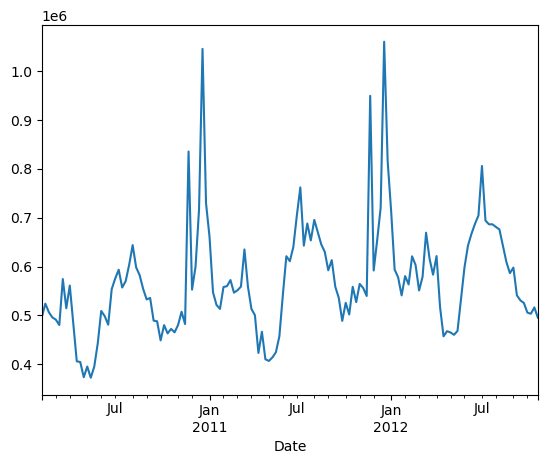

In [15]:
store['Weekly_Sales'].plot()

In [16]:
# Checking the stationarity of the data

from statsmodels.tsa.stattools import adfuller

result = adfuller(store['Weekly_Sales'])
p_value = result[1]
print(p_value)
if p_value < 0.05:
    print("The time series is stationary")
else:
    print("The time series is non-stationary")
    

0.00021700718907117402
The time series is stationary


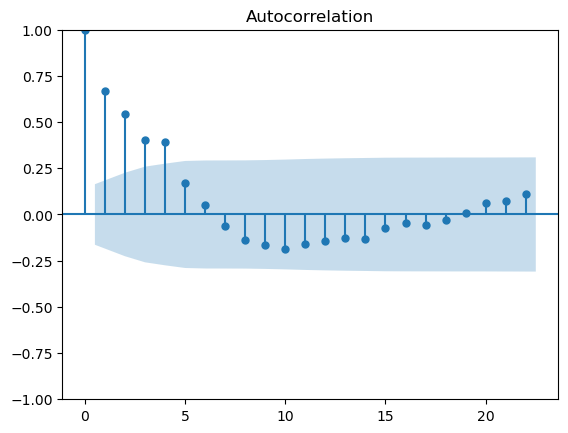

In [17]:
# Autocorrelation

from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(store['Weekly_Sales']);

C:\Users\Vignesh Murali\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


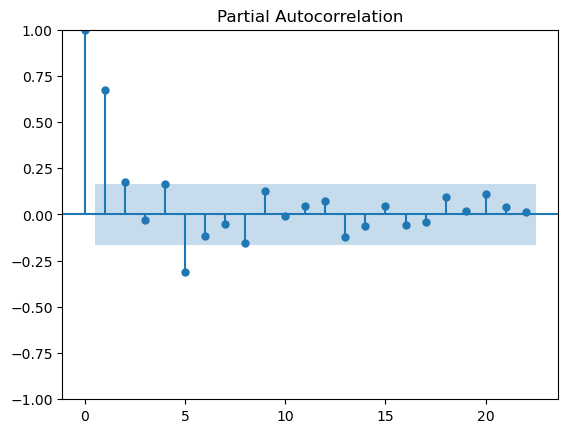

In [18]:
# Partial Autocorrelation

from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(store['Weekly_Sales']);

In [19]:
from pmdarima import auto_arima

order = auto_arima(store['Weekly_Sales'], trace=True)
order.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3636.920, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3649.620, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3640.902, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3639.145, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3647.623, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3641.331, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3636.408, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3640.685, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3642.191, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3635.110, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3636.887, Time=0.05 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=3635.576, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3634.959, Time=0.16 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3636.384, Time=0.30 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(4, 1, 3)   Log Likelihood               -1807.573
Date:                Fri, 21 Apr 2023   AIC                           3631.146
Time:                        21:21:22   BIC                           3654.793
Sample:                    02-05-2010   HQIC                          3640.755
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3604      0.314     -1.149      0.251      -0.975       0.255
ar.L2          0.1928      0.171      1.130      0.259      -0.142       0.527
ar.L3          0.3643      0.216      1.690      0.091      -0.058       0.787
ar.L4          0.2191      0.094      2.333      0.020       0.035       0.403
ma.L1          0.0817      0.310      0.263      0.792      -0.527       0.690
ma.L2         -0.4255      0.138     -3.091      0.002      -0.695      -0.156
ma.L3         -0.5682      0.255     -2.231      0.026      -1.067      -0.069
sigma2       6.65e+09   1.13e-10   5.89e+19      0.000    6.65e+09    6.65e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):               348.56
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                             1.58
Prob(H) (two-sided):                  0.02   Kurtosis:                        10.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.2e+35. Standard errors may be unstable.
"""

In [20]:
# ARIMA Model for Time Series Forecasting

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

train = store.iloc[:100]['Weekly_Sales']
test = store.iloc[101:]['Weekly_Sales']

In [21]:
model = sm.tsa.arima.ARIMA(train, order=(4,1,3))
model_fit = model.fit()
model_fit.summary()

C:\Users\Vignesh Murali\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Vignesh Murali\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Vignesh Murali\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Vignesh Murali\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Vignesh Murali\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  100
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -1271.879
Date:                Fri, 21 Apr 2023   AIC                           2559.758
Time:                        21:21:23   BIC                           2580.519
Sample:                    02-05-2010   HQIC                          2568.158
                         - 12-30-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1232      0.346      0.356      0.722      -0.555       0.802
ar.L2          0.0114      0.351      0.033      0.974      -0.676       0.699
ar.L3         -0.3832      0.332     -1.156      0.248      -1.033       0.267
ar.L4          0.1783      0.141      1.264      0.206      -0.098       0.455
ma.L1         -0.4863      0.358     -1.359      0.174      -1.188       0.215
ma.L2          0.0160      0.426      0.038      0.970      -0.819       0.851
ma.L3          0.3587      0.382      0.938      0.348      -0.390       1.108
sigma2      8.362e+09   2.81e-10   2.98e+19      0.000    8.36e+09    8.36e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):               128.57
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               3.18   Skew:                             1.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.54e+34. Standard errors may be unstable.
"""

C:\Users\Vignesh Murali\AppData\Local\Temp\ipykernel_14400\1936169350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['predict'] = model_fit.predict(start= len(train),


<AxesSubplot:xlabel='Date'>

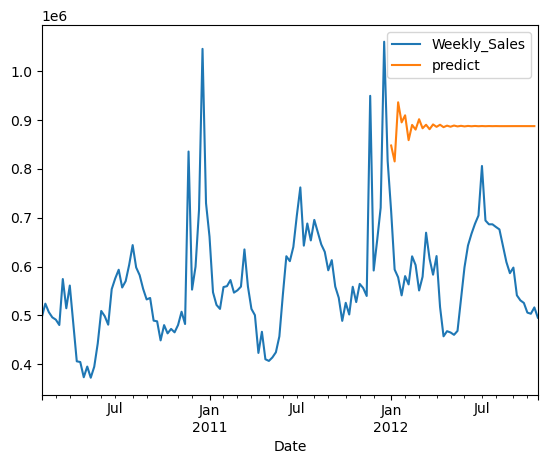

In [22]:
store['predict'] = model_fit.predict(start= len(train),
                                     end=len(train)+len(test)-1,
                                     dynamic=True)

store[['Weekly_Sales','predict']].plot()

In [23]:
# We can see the predictions are way away from the actual test values.
# Thus we are moving to Seasonal ARIMA model for our forecasting (SARIMAX)

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order=(4,1,3), seasonal_order=(4,1,3,52))
model = model.fit()

C:\Users\Vignesh Murali\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Vignesh Murali\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Vignesh Murali\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Vignesh Murali\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\Vignesh Murali\AppData\Local\Temp\ipykernel_14400\595716230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['predict'] = model.predict(start= len(train),


<AxesSubplot:xlabel='Date'>

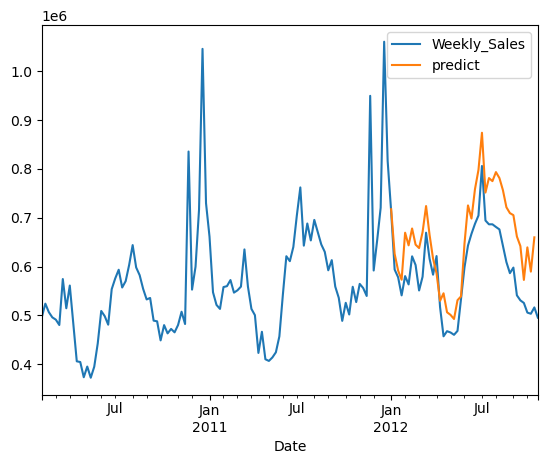

In [24]:
store['predict'] = model.predict(start= len(train),
                                     end=len(train)+len(test)-1,
                                     dynamic=True)

store[['Weekly_Sales','predict']].plot()

<AxesSubplot:xlabel='Date'>

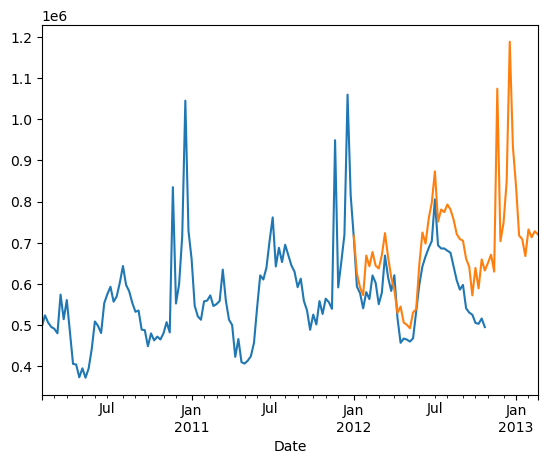

In [25]:
# We can observe the the test data and predicted data are almost following a same pattern
# predicting the projection for the next 12 weeks

forecast = model.forecast(steps=60)
store['Weekly_Sales'].plot()
forecast.plot()

In [26]:
forecast.tail(17)

2012-11-02    6.511736e+05
2012-11-09    6.713182e+05
2012-11-16    6.302026e+05
2012-11-23    1.074182e+06
2012-11-30    7.040335e+05
2012-12-07    7.482543e+05
2012-12-14    8.489533e+05
2012-12-21    1.188140e+06
2012-12-28    9.333088e+05
2013-01-04    8.379857e+05
2013-01-11    7.177353e+05
2013-01-18    7.086692e+05
2013-01-25    6.678757e+05
2013-02-01    7.325739e+05
2013-02-08    7.134663e+05
2013-02-15    7.281028e+05
2013-02-22    7.209120e+05
Freq: W-FRI, Name: predicted_mean, dtype: float64

In [27]:
# Model Evaluation using Residuals

residuals = model.resid

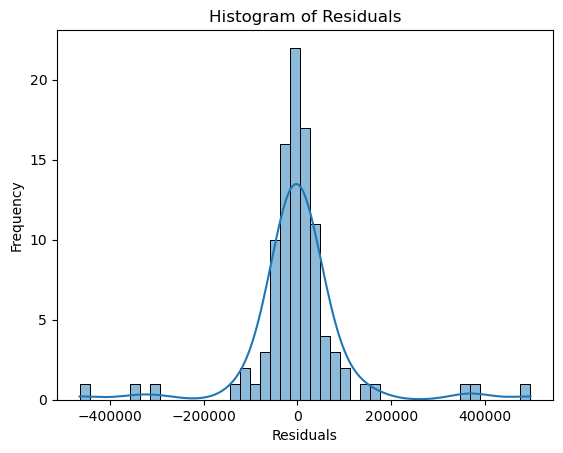

In [28]:
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [29]:
pred = model.predict(start= len(train), end=len(train)+len(test)-1, dynamic=True)

mse = mean_squared_error(test, pred)
mae = mean_absolute_error(test, pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - pred) / test)) * 100

print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)
print('MAPE:', mape,'%')

MSE: 8328880543.283994
MAE: 77000.867412333
RMSE: 91262.7007231541
MAPE: 12.19831297082327 %
